# Loan Eligiblity Prediction 🤝📜📃⚖️💵

## Importing Library's

In [25]:
import pandas as pd

In [164]:
df = pd.read_csv("./Track_1.csv")

## Preprocessing

In [165]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [166]:
df.shape

(600, 22)

In [167]:
df.head()

,Number of people who will provide maintenance,Loan History,Purpose of taking loan,loan amount taken,Guarantor or Debtor,Number of years of employment,Marital Status,Number of loans taken from current bank,Age of the applicant in Number of Years,amount in current account,...,Other loans plans taken,Working abroad or not,Is there telephone number available,time duration for loan,Owned property,Type of job performed,Type of Housing,Number of years of stay in current address,Loan Defaulted or not,1=defaulted
0,1,critical account/other loans existing (not at ...,New Car Purchase,1028,none,between 1 and 4 years,female and divorced/seperated/married,2,36,no current account,...,none,Yes,No,18,Real Estate,skilled employee / official,own,3,1,2=not defaulted
1,1,existing loans paid back duly till now,Purchase of radio/television,10222,none,greater than 4 years,male and single,1,37,no current account,...,stores,Yes,Yes,48,car or other property,skilled employee / official,own,3,1,NaN
2,1,existing loans paid back duly till now,Purchase of radio/television,701,none,between 1 and 4 years,male and married/widowed,1,40,less than 0,...,none,Yes,No,12,Real Estate,unskilled - resident,own,2,1,NaN
3,1,existing loans paid back duly till now,Purchase of radio/television,1670,none,less than a year,female and divorced/seperated/married,1,22,between 0 and 200,...,none,Yes,Yes,9,car or other property,skilled employee / official,own,2,2,NaN
4,1,critical account/other loans existing (not at ...,New Car Purchase,1163,none,between 1 and 4 years,male and single,1,44,no current account,...,none,Yes,Yes,12,Real Estate,skilled employee / official,own,4,1,NaN


In [168]:
df['Purpose of taking loan'].unique()

array(['New Car Purchase', 'Purchase of radio/television',
       'Old Car Repair', 'Purchase of furniture/equipment',
       'Other repairs', 'Education Loan',
       'Loan for business establishment', nan, 'Loan for retraining',
       'Purchase of domestic appliances'], dtype=object)

In [169]:
df['Type of Housing'].unique()

array(['own', 'for free', 'rent'], dtype=object)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Number of people who will provide maintenance  600 non-null    int64 
 1   Loan History                                   600 non-null    object
 2   Purpose of taking loan                         591 non-null    object
 3   loan amount taken                              600 non-null    int64 
 4   Guarantor or Debtor                            600 non-null    object
 5   Number of years of employment                  447 non-null    object
 6   Marital Status                                 600 non-null    object
 7   Number of loans taken from current bank        600 non-null    int64 
 8   Age of the applicant in Number of Years        600 non-null    int64 
 9   amount in current account                      600 non-null    ob

In [171]:
df = df.drop(['1=defaulted','Other loans plans taken'],axis=1)

In [172]:
#Other loans plans taken --> Drop Not UseFull

In [173]:
#Renameing Coloumn Name For Convinence
df.rename(columns = {'Number of people who will provide maintenance':'NPPM','Purpose of taking loan': 'Objective',
                     'loan amount taken': 'Amount','Guarantor or Debtor': 'Guarantor','Loan History':'LoanStatus',
                     'Number of years of employment': 'Experience','Marital Status' : 'M_Status','Number of loans taken from current bank': 'ExistingLoan',
                     'Age of the applicant in Number of Years': 'Age','amount in current account': 'CA_Balance',
                     'amount in savings account': 'SA_Balance','% of income paid as installment': 'PI_Payment',
                     'Working abroad or not': 'WorkAB', 'Is there telephone number available': 'PhN',
                     'time duration for loan': 'Tenure', 'Owned property': 'prop', 'Type of job performed': 'JobTyp',
                     'Type of Housing':'HouseT','Number of years of stay in current address': 'NOE','Loan Defaulted or not': 'prediction'}, inplace = True)

In [174]:
df.head()

,NPPM,LoanStatus,Objective,Amount,Guarantor,Experience,M_Status,ExistingLoan,Age,CA_Balance,SA_Balance,PI_Payment,WorkAB,PhN,Tenure,prop,JobTyp,HouseT,NOE,prediction
0,1,critical account/other loans existing (not at ...,New Car Purchase,1028,none,between 1 and 4 years,female and divorced/seperated/married,2,36,no current account,less than 100,4,Yes,No,18,Real Estate,skilled employee / official,own,3,1
1,1,existing loans paid back duly till now,Purchase of radio/television,10222,none,greater than 4 years,male and single,1,37,no current account,no savings account,4,Yes,Yes,48,car or other property,skilled employee / official,own,3,1
2,1,existing loans paid back duly till now,Purchase of radio/television,701,none,between 1 and 4 years,male and married/widowed,1,40,less than 0,less than 100,4,Yes,No,12,Real Estate,unskilled - resident,own,2,1
3,1,existing loans paid back duly till now,Purchase of radio/television,1670,none,less than a year,female and divorced/seperated/married,1,22,between 0 and 200,less than 100,4,Yes,Yes,9,car or other property,skilled employee / official,own,2,2
4,1,critical account/other loans existing (not at ...,New Car Purchase,1163,none,between 1 and 4 years,male and single,1,44,no current account,between 500 and 1000,4,Yes,Yes,12,Real Estate,skilled employee / official,own,4,1


In [175]:
Name_of_Input = {'Number of people who will provide maintenance':'NPPM','Purpose of taking loan': 'Objective',
                     'loan amount taken': 'Amount','Guarantor or Debtor': 'Guarantor','Loan History':'LoanStatus',
                     'Number of years of employment': 'Experience','Marital Status' : 'M_Status','Number of loans taken from current bank': 'ExistingLoan',
                     'Age of the applicant in Number of Years': 'Age','amount in current account': 'CA_Balance',
                     'amount in savings account': 'SA_Balance','% of income paid as installment': 'PI_Payment',
                     'Working abroad or not': 'WorkAB', 'Is there telephone number available': 'PhN',
                     'time duration for loan': 'Tenure', 'Owned property': 'prop', 'Type of job performed': 'JobTyp',
                     'Type of Housing':'HouseT','Number of years of stay in current address': 'NOE','Loan Defaulted or not': 'prediction'}

In [176]:
len(Name_of_Input)

20

In [177]:
temp = pd.DataFrame(Name_of_Input,index=[0])
temp.head()

,Number of people who will provide maintenance,Purpose of taking loan,loan amount taken,Guarantor or Debtor,Loan History,Number of years of employment,Marital Status,Number of loans taken from current bank,Age of the applicant in Number of Years,amount in current account,amount in savings account,% of income paid as installment,Working abroad or not,Is there telephone number available,time duration for loan,Owned property,Type of job performed,Type of Housing,Number of years of stay in current address,Loan Defaulted or not
0,NPPM,Objective,Amount,Guarantor,LoanStatus,Experience,M_Status,ExistingLoan,Age,CA_Balance,SA_Balance,PI_Payment,WorkAB,PhN,Tenure,prop,JobTyp,HouseT,NOE,prediction


In [78]:
df['Objective'].unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [189]:
df = df.dropna()

In [191]:
df.isna().sum()

NPPM            0
LoanStatus      0
Objective       0
Amount          0
Guarantor       0
Experience      0
M_Status        0
ExistingLoan    0
Age             0
CA_Balance      0
SA_Balance      0
PI_Payment      0
WorkAB          0
PhN             0
Tenure          0
prop            0
JobTyp          0
HouseT          0
NOE             0
prediction      0
dtype: int64

In [178]:
for i in Name_of_Input:
    print("#-------------------------------#")
    print(i)
    print(df[Name_of_Input[i]].unique())
#     print("#-------------------------------#")

#-------------------------------#
Number of people who will provide maintenance
[1 2]
#-------------------------------#
Purpose of taking loan
['New Car Purchase' 'Purchase of radio/television' 'Old Car Repair'
 'Purchase of furniture/equipment' 'Other repairs' 'Education Loan'
 'Loan for business establishment' nan 'Loan for retraining'
 'Purchase of domestic appliances']
#-------------------------------#
loan amount taken
[ 1028 10222   701  1670  1163  2325 10477  2862 10127  2659  1533  1231
   804  3632  1543  4454  1549   683  2671   685  1377  8386  3105  8335
  1766  1555  1098  1316  5129  2462  1505  1680  3595  3949  1364  1935
   609  2910  1388   433  1228  6836  5801   907  3590   795  7582  7485
  1474  2930  3872  3656  4576  1050  1376  1372  1287  5943  3108  1049
  7472  1216  2957  3049  3190  3939  1082  2579  1924  3485  3959  1308
  2241  3017  1209  1569  1203   276  1422  3229   754  6070  1927  6204
  3990   625  1424  2337  1845  1433  1204  4526  2333  1655 

In [192]:
df.Objective = df.Objective.replace({"New Car Purchase": 0, "Purchase of radio/television" : 1,'Purchase of furniture/equipment' : 2,'Old Car Repair': 3,'Education Loan': 4,
                                    'Loan for business establishment': 5,'Other repairs': 6,'Purchase of domestic appliances': 7,'Loan for retraining': 8})

df.Guarantor = df.Guarantor.replace({'none' : 0,'gaurantor' : 1,'co-applicant':  2})

df.LoanStatus = df.LoanStatus.replace({'critical account/other loans existing (not at this bank)' : 0,'existing loans paid back duly till now' : 1,'all loans at this bank paid back duly':  2,'delay in paying off loans in the past' : 3,
                                       'no loans taken/all loans paid back duly': 4})

df.Experience = df.Experience.replace({'between 1 and 4 years': 0, 'greater than 4 years': 1,'less than a year': 2,'unemployed': 3})

df.M_Status = df.M_Status.replace({'female and divorced/seperated/married': 0,'male and single': 1,'male and married/widowed': 2,
                                  'male and divorced/seperated': 3})

df.CA_Balance = df.CA_Balance.replace({'no current account': 0,'less than 0': 1,'between 0 and 200': 3,'greater than 200': 4})

df.SA_Balance = df.SA_Balance.replace({'less than 100': 0,'no savings account': 1,'between 500 and 1000': 2,
                                      'between 100 and 500': 3,'greater than 1000': 4})

df.WorkAB = df.WorkAB.replace({'Yes': 1,'No': 0})

df.PhN = df.PhN.replace({'Yes': 1,'No': 0})

df.prop = df.prop.replace({'Real Estate': 0,'car or other property': 1,'No property': 2,'building society savings agreement/life insurance': 3})

df.JobTyp = df.JobTyp.replace({'skilled employee / official': 0,'unskilled - resident': 1,'unemployed/ unskilled - non-resident': 2,'management/ self-employed/highly qualified employee/ officer': 3})

df.HouseT = df.HouseT.replace({'own': 0,'for free': 1,'rent': 3})

df.prediction = df.prediction.replace({2 : 0})

In [180]:
df['prediction'].unique()

array([1, 0])

In [181]:
df.isna().sum()

NPPM              0
LoanStatus        0
Objective         9
Amount            0
Guarantor         0
Experience      153
M_Status          0
ExistingLoan      0
Age               0
CA_Balance        0
SA_Balance        0
PI_Payment        0
WorkAB            0
PhN               0
Tenure            0
prop              0
JobTyp            0
HouseT            0
NOE               0
prediction        0
dtype: int64

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [194]:
X = df.drop(['prediction'],axis=1)
Y = df['prediction']

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [196]:
print("Size of X Train:- " + str(X_train.shape))
print("Size of Y Train:- " + str(y_train.shape))
print("Size of X Test:- " + str(X_test.shape))
print("Size of Y Test:- " + str(y_test.shape))

Size of X Train:- (352, 19)
Size of Y Train:- (352,)
Size of X Test:- (89, 19)
Size of Y Test:- (89,)


## Logistic Regression Model

In [197]:
logistic_model = LogisticRegression()

In [198]:
logistic_model.fit(X_train, y_train)

/Users/hemangjiwnani/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [199]:
predicted = logistic_model.predict(X_test)

In [132]:
score = logistic_model.score(X_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.7414772727272727
accuracy_score percent : 74.15


## Decision Tree Classification Model

In [200]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [201]:
dtree= DecisionTreeClassifier(max_leaf_nodes=3)

In [202]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

In [203]:
predictions= dtree.predict(X_test)

In [204]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.55      0.60      0.57        20
           1       0.88      0.86      0.87        69

    accuracy                           0.80        89
   macro avg       0.71      0.73      0.72        89
weighted avg       0.81      0.80      0.80        89



## Random Forest Classification Model 

In [205]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [281]:
reg_rf = RandomForestClassifier(max_depth=10,min_samples_split= 5,n_estimators= 122)

reg_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=122)

In [282]:
y_pred = reg_rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.45      0.55        20
           1       0.86      0.94      0.90        69

    accuracy                           0.83        89
   macro avg       0.77      0.70      0.72        89
weighted avg       0.82      0.83      0.82        89



In [283]:
scores = cross_val_score(reg_rf, X_train, y_train, cv=5)

# Print the mean and standard deviation of the scores
print("Mean accuracy: ", scores.mean())
print("Standard deviation: ", scores.std())

Mean accuracy:  0.7158953722334005
Standard deviation:  0.023794574991870748


In [276]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [245]:
clf = RandomForestClassifier(random_state=0)

In [246]:
param_grid = {'n_estimators': [100, 200, 500],
              'max_depth': [2, 5, 10],
              'min_samples_split': [2, 5, 10]}

In [269]:
random_search = RandomizedSearchCV(clf, param_grid, cv=5,
                                   n_iter=10, random_state=0,
                                   scoring='accuracy')
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best parameters:  {'n_estimators': 500, 'min_samples_split': 2, 'max_depth': 10}
Best score:  0.7272434607645876


In [208]:
from xgboost import XGBClassifier
from xgboost import plot_importance  
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV,StratifiedKFold 

In [209]:
y_train.unique()

array([0, 1])

In [210]:
model = XGBClassifier() 

learning_rate = [0.01, 0.1, 0.2] 
max_depth=[6]
booster=['gbtree']
n_estimators=[100]
nthread=[6]
min_child_weight=[1,5,10,20,30]

param_grid = dict(min_child_weight=min_child_weight,nthread=nthread,learning_rate=learning_rate,max_depth=max_depth,booster=booster,n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7) 
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs = 10, cv=kfold) 
grid_result = grid_search.fit(X_train, y_train)

In [211]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params']

Best: 0.724225 using {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'nthread': 6}


In [214]:
def evalua(y_pred,y_test):
    
    # Evaluate of predictions 
    accuracy = accuracy_score(y_test, y_pred) 
    roc = roc_auc_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)

    # Data test results
    print('Evaluation of predictions: \n')
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print("Area ROC: %.2f%%" % (roc * 100.0))
    print("F1 Score: %.2f%%" % (f1 * 100.0))

Evaluation of predictions: 

Accuracy: 79.78%
Area ROC: 69.20%
F1 Score: 87.14%


NameError: name 'plt' is not defined

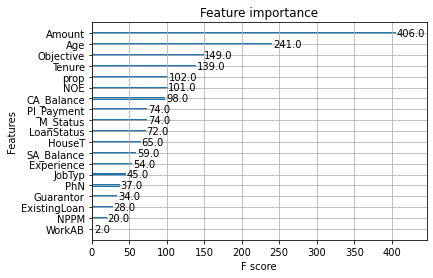

In [216]:
from sklearn.metrics import accuracy_score, roc_auc_score,f1_score, confusion_matrix, classification_report
model_best = grid_search.best_estimator_
y_pred=model_best.predict(X_test)
evalua(y_pred,y_test)

# Plot feature importance 
plot_importance(model_best) 
plt.show()

In [217]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [221]:
k=3
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)
y_head=knn.predict(X_test)
print("KNN Algoritması başarım sonucu: ",knn.score(X_test,y_test))


KNN Algoritması başarım sonucu:  0.5393258426966292
